# The pandas `groupby()` method

Understanding how to group data is essential for performing a number of operations on pandas DataFrames. 

Groupby refers to a process involving one or more of the following steps: 
 - splitting the data into groups based on some criteria.
 - applying a function to each group independently.
 - combining the results into a data structure. 

The main takeaway is that with `groupby()` we can group categories and then apply functions to the categories instead of to the entire data set.

Before showing code examples of `groupby()` let's get a quick conceptual overview of what it means to perform a function to a category as opposed to the entire data set.

Consider the following image, a sample of the Hansard data. If we were to group this data by decade it would be as though we stuck each decade into a bucket to be operated upon independantly from the rest of the data.

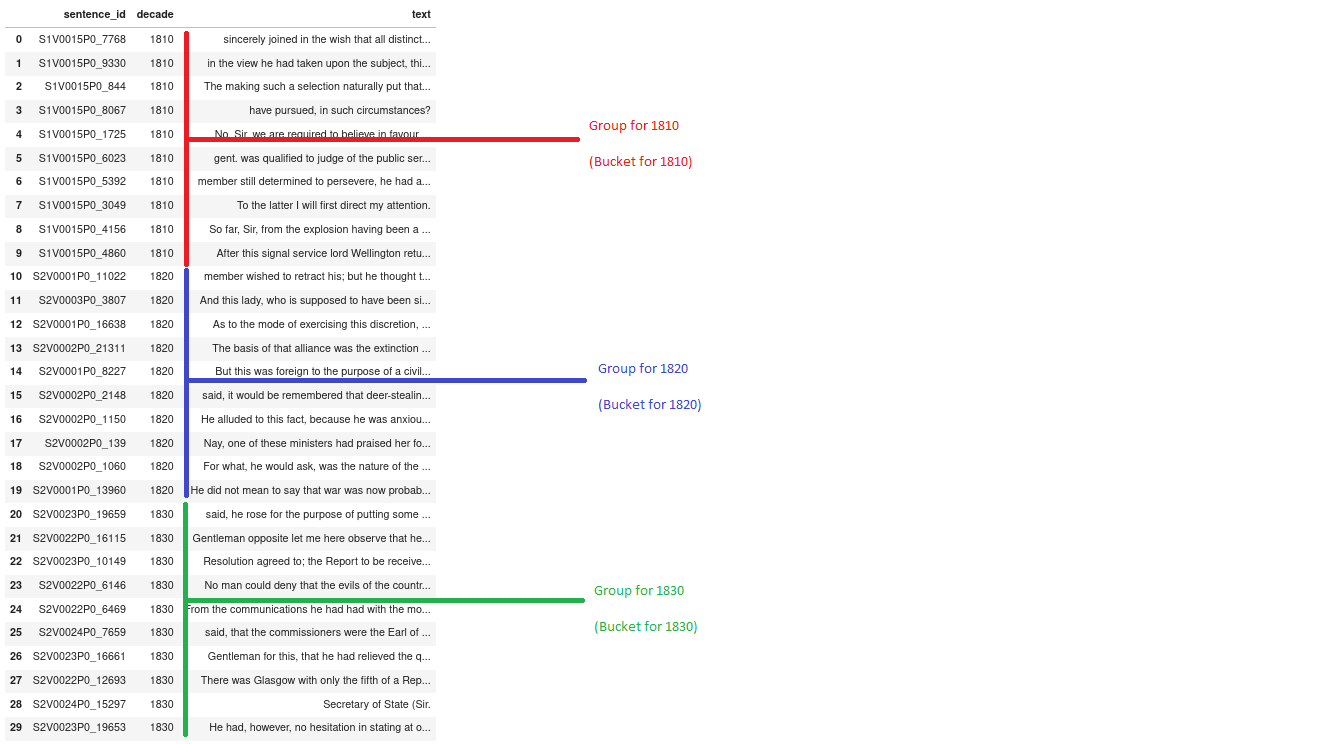

The following code example demonstrates this concept in action. During this example we will:

1. Count the number of words in each sentence of our Hansard sample
2. Group the data by decade
3. Sum the total number of words per each decade based on our sentence-level word counts

### Code example:

First let's import pandas and read in the Hansard data, a random sample of ten sentences from the following decades: 1810, 1820, and 1830.

In [21]:
import pandas as pd

hansard_sampled = pd.read_csv("~/random_sample_data.csv")

In [22]:
hansard_sampled

,sentence_id,decade,text
0,S1V0015P0_7768,1810,sincerely joined in the wish that all distinct...
1,S1V0015P0_9330,1810,"in the view he had taken upon the subject, thi..."
2,S1V0015P0_844,1810,The making such a selection naturally put that...
3,S1V0015P0_8067,1810,"have pursued, in such circumstances?"
4,S1V0015P0_1725,1810,"No, Sir, we are required to believe in favour ..."
5,S1V0015P0_6023,1810,gent. was qualified to judge of the public ser...
6,S1V0015P0_5392,1810,"member still determined to persevere, he had a..."
7,S1V0015P0_3049,1810,To the latter I will first direct my attention.
8,S1V0015P0_4156,1810,"So far, Sir, from the explosion having been a ..."
9,S1V0015P0_4860,1810,After this signal service lord Wellington retu...


After reading in the Hansard data we can count the number of words in each sentence:

In [23]:
hansard_sampled['count'] = hansard_sampled['text'].str.count(' ') + 1

In [24]:
hansard_sampled

,sentence_id,decade,text,count
0,S1V0015P0_7768,1810,sincerely joined in the wish that all distinct...,22
1,S1V0015P0_9330,1810,"in the view he had taken upon the subject, thi...",28
2,S1V0015P0_844,1810,The making such a selection naturally put that...,44
3,S1V0015P0_8067,1810,"have pursued, in such circumstances?",5
4,S1V0015P0_1725,1810,"No, Sir, we are required to believe in favour ...",176
5,S1V0015P0_6023,1810,gent. was qualified to judge of the public ser...,30
6,S1V0015P0_5392,1810,"member still determined to persevere, he had a...",39
7,S1V0015P0_3049,1810,To the latter I will first direct my attention.,9
8,S1V0015P0_4156,1810,"So far, Sir, from the explosion having been a ...",46
9,S1V0015P0_4860,1810,After this signal service lord Wellington retu...,22


To count the number of words for each decade, we can use `groupby()` followed by another method, `.sum()`. The process where we invoke one method after another is called "chaining."

In [25]:
decade_counts = hansard_sampled.groupby(['decade']).sum() 

In [26]:
decade_counts

,count
decade,
1810,421
1820,316
1830,293


Our new data structure contains the word counts for each decade.